In [36]:
import sys
import torch
from torch.utils.data import DataLoader
sys.path.insert(0, "..")
import model_xformers

filename = "runs/mm-ss3c-batch_size 2048, batches_per_epoch 4, dropout 0.2, numchar 64, nblock 2, nhead 4, emb_len 12.torch"

net: model_xformers.LangModel = torch.load(filename)


In [53]:
textmap = net.textmap
all_pairs = textmap.as_pairs()
dataloader = DataLoader(all_pairs, batch_size=1, shuffle=True)

dataloader_it = iter(dataloader)


d so doth mine: I muse why she's at liberty.^^GLOUCESTER:^I cann
 123456789 123456789 123456789 123456789 123456789 123456789 123
0         1         2         3         4         5         6         


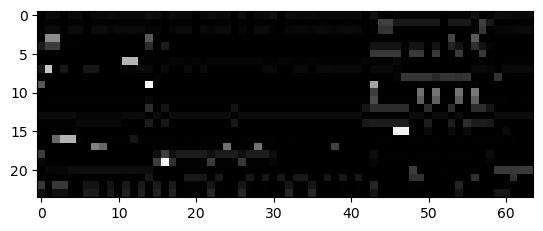

In [93]:
import matplotlib.pyplot as plt

inputs, truth = next(dataloader_it)
inputs_emb = net.tok_embedding(inputs) + net.pos_embedding(torch.arange(0, 64, device="cuda"))

# print(f"{inputs=}")
# print(f"{inputs.shape=}")
# print(f"{inputs[0].shape=}")
s = "".join(textmap.token_to_char[t.item()] for t in inputs[0])
s = s.replace("\n", "^")
print(s)
digits = " 123456789" * (len(s) // 10 + 1)
digits = digits[:len(s)]
digits2 = "".join([(str(d) + " " * 9) for d in range(len(s) // 10 + 1)])
print(digits)
print(digits2)                   

block0 = net.blocks[0]
heads = block0.mh_attn.heads

qs = [head(inputs_emb) for block in net.blocks for head in block.mh_attn.heads]
# print(f"{qs[0].shape}")
q = torch.cat(qs, dim=-1)
# print(f"{q.shape=}")
q = q[0].transpose(0, 1)
# print(f"{q.shape=}")

plt.imshow(q.softmax(dim=-1).detach().cpu(), cmap='gray')

In [75]:
inputs, truth

(tensor([[50,  1, 56, 43, 55, 59, 47, 58, 43,  1, 58, 46, 47, 57,  1, 49, 47, 52,
          42, 52, 43, 57, 57,  8,  0, 26, 53, 61,  6,  1, 44, 53, 56,  1, 58, 46,
          47, 57,  1, 52, 47, 45, 46, 58,  6,  1, 50, 43, 58,  5, 57,  1, 46, 39,
          56, 40, 53, 59, 56,  1, 46, 43, 56, 43]], device='cuda:0'),
 tensor([[ 1, 56, 43, 55, 59, 47, 58, 43,  1, 58, 46, 47, 57,  1, 49, 47, 52, 42,
          52, 43, 57, 57,  8,  0, 26, 53, 61,  6,  1, 44, 53, 56,  1, 58, 46, 47,
          57,  1, 52, 47, 45, 46, 58,  6,  1, 50, 43, 58,  5, 57,  1, 46, 39, 56,
          40, 53, 59, 56,  1, 46, 43, 56, 43,  1]], device='cuda:0'))